Задание: Вывести для каждого узла:
- Количество прямых предков
- Количество прямых потомков
- Количество не прямых предков
- Количество непрямых потомков
- Количество братьев (те, с которыми один и тот же предок)

Используем код из task1 для конвертации json:

In [68]:
import json

def dict_to_tree(result, tree, parent):
    for x in tree:
        for i in tree[x]:
            result.append([int(x), int(i)])
        dict_to_tree(result, tree[x], x)

def json_to_tree(file_name):
    result = []
    with open(file_name, "r") as file:
        tree = json.loads(file.read())

    dict_to_tree(result, tree, 0)
    return result


tmp = json_to_tree("tree.json")
print(tmp)

[[1, 2], [2, 3], [2, 4], [3, 5], [3, 6], [4, 7], [4, 8]]


Это конечно не самый эффективный алгоритм для поиска братьев и сестер, но задачу решает:

In [69]:
def find_bro_and_sis(child):
    parent = None
    for x in tmp:
        if x[1] == child:
            parent = x[0]

    bro_and_sis = []
    for x in tmp:
        if x[0] == parent and x[1] != child:
            bro_and_sis.append(x[1])
    print(bro_and_sis)

In [70]:
child = 5
find_bro_and_sis(child)

[6]


Поиск потомков будет легче написать с использованием класса: (так же впишу поиск братьев и сестер)

In [113]:
class Tree:
    # Корень дерева
    root = None

    def __init__(self, value):
        self.value = value
        self.parent = None
        self.children = []

    def add_child(self, child_node):
        self.children.append(child_node)
        child_node.parent = self

def build_tree(edges):
    nodes = {}

    for parent, child in edges:
        if parent not in nodes:
            nodes[parent] = Tree(parent)

        if child not in nodes:
            nodes[child] = Tree(child)

        parent_node = nodes[parent]
        child_node = nodes[child]
        parent_node.add_child(child_node)

    Tree.root = nodes[edges[0][0]]
    return nodes

def find_ancestors(node): # r1 - отношение непосредственного управления (прямые предки)
    if node is Tree.root:
        return []
    
    return [node.parent.value]

def find_descendants(node): # r2 - отношение непосредственного подчинения (прямые потомки)
    result = []
    for tmp in node.children:
        if tmp is not None:
            result.append(tmp.value)
    return result

def find_indirect_ancestors(child, node): # r3 - отношение опосредованного управления (непрямые предки)
    ancestors = []
    
    if node is not Tree.root:
        if node is not child:
            ancestors.append(node.parent.value)
        ancestors += find_indirect_ancestors(child, node.parent)

    return ancestors

def find_indirect_descendants(parent, node): # r4 - отношение опосредованного подчинения (непрямые потомки)
    descendants = []
    
    for child in node.children:
        if child is not None:
            if node is not parent:
                descendants.append(child.value)
            descendants += find_indirect_descendants(parent, child)

    return descendants

def bro_and_sis(node): # r5 - отношение соподчинения на одном уровне (братья и сестры)
    if node is Tree.root:
        return []
    
    parent = node.parent
    result = []

    for tmp in parent.children:
        if (tmp != node): 
            result.append(tmp.value)

    return result


In [114]:
edges = json_to_tree("tree.json")
tree = build_tree(edges) # словарь с названием и вершиной

print(find_ancestors(tree[5])) # прямые предки
print(find_descendants(tree[2])) # прямые потомки
print(find_indirect_ancestors(tree[5], tree[5])) # непрямые предки
print(find_indirect_descendants(tree[2], tree[2])) # непрямые потомки
print(bro_and_sis(tree[5])) # братья и сестры


[3]
[3, 4]
[2, 1]
[5, 6, 7, 8]
[6]


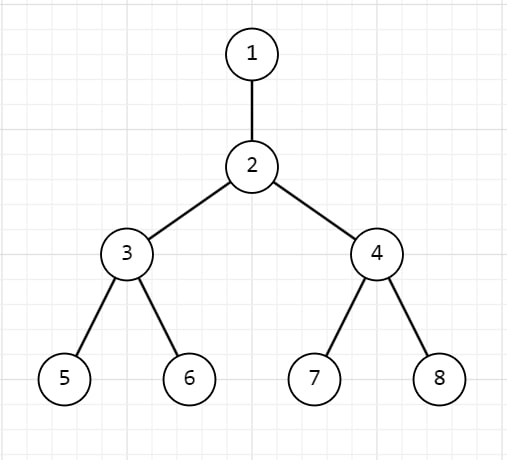

Ну и выведем матрицу отношений для каждой вершины

In [115]:
matrix = []
for node in tree:
    tmp = []
    tmp.append(len(find_ancestors(tree[node]))) # прямые предки
    tmp.append(len(find_descendants(tree[node]))) # прямые потомки
    tmp.append(len(find_indirect_ancestors(tree[node], tree[node]))) # непрямые предки
    tmp.append(len(find_indirect_descendants(tree[node], tree[node]))) # непрямые потомки
    tmp.append(len(bro_and_sis(tree[node]))) # братья и сестры
    matrix.append(tmp)
print(matrix)

[[0, 1, 0, 6, 0], [1, 2, 0, 4, 0], [1, 2, 1, 0, 1], [1, 2, 1, 0, 1], [1, 0, 2, 0, 1], [1, 0, 2, 0, 1], [1, 0, 2, 0, 1], [1, 0, 2, 0, 1]]
